# Vela pulsar observations with the Ooty Radio Telescope

We have been given a sample of the voltage signal obtained from an observation of the Vela pulsar (PSR B0833-45) with the Ooty Radio Telescope. The Ooty Radio Telescope consists of a cylindrical paraboloid reflecting surface which is 530 m long and 30 m wide, placed on a slope of 11.2 degrees in the north-south direction in Muthorai village near Ooty. The signal detectors consist of an array of 1056 half-wave dipoles which are operated to produce phased array beams in the sky.

The observation has been conducted at 326.5 MHz with a bandwidth of 16.5 MHz, and the voltage signals from the northern and southern half of the telescope is available to us. Note that we will not use any specific set of units to quantify the voltage or the intensity signals, since no calibration data has been provided.

## Statistics with the Data 

In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.signal as sc
from IPython.display import Latex
from scipy.ndimage import shift

In [2]:
df = pd.read_table('Python/ch00_B0833-45_20150612_191438_010_4.dms',delimiter=' ',header= None)
data = np.asarray(df)

In [3]:
V_nth = []
V_sth = []
Nmax=512
for i in range(Nmax):
    V_nth.append(df.values[i][0])
    V_sth.append(df.values[i][1])

In [4]:
mu1 , sig1 = norm.fit(V_nth)
mu2 , sig2 = norm.fit(V_sth)

print('Mean1: ',mu1," ",'Std1: ',sig1)
print('Mean2: ',mu2," ",'Std2: ',sig2)

Mean1:  3.455078125   Std1:  27.764880821374806
Mean2:  0.38671875   Std2:  30.66067532048827


(array([ 10.,  24.,  54.,  95., 114., 105.,  67.,  31.,  11.,   1.]),
 array([-82. , -64.2, -46.4, -28.6, -10.8,   7. ,  24.8,  42.6,  60.4,
         78.2,  96. ]),
 <a list of 10 Patch objects>)

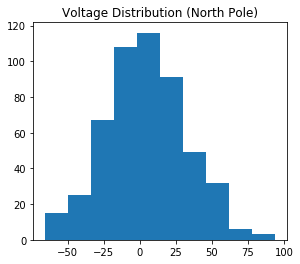

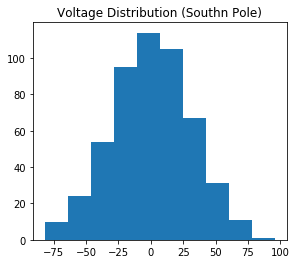

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.title('Voltage Distribution (North Pole)')
plt.hist(V_nth)

plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.title('Voltage Distribution (Southn Pole)')
plt.hist(V_sth)



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


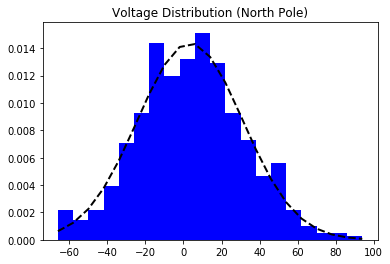

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


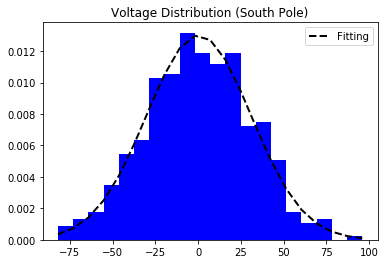

In [6]:

n1,bins1,patches1=plt.hist(V_nth,20,normed=1,facecolor='b',align='mid')
y1 = norm.pdf(bins1,mu1,sig1)
plt.plot(bins1,y1,'k--',lw=2,label='Fitting')
plt.title('Voltage Distribution (North Pole)')
plt.show()

n2,bins2,patches2=plt.hist(V_sth,20,normed=1,facecolor='b',align='mid')
y2 = norm.pdf(bins2,mu2,sig2)
plt.plot(bins2,y2,'k--',lw=2,label='Fitting')
plt.title('Voltage Distribution (South Pole)')

plt.legend()
plt.show()


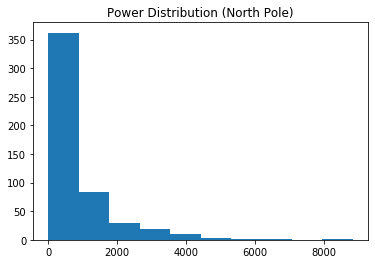

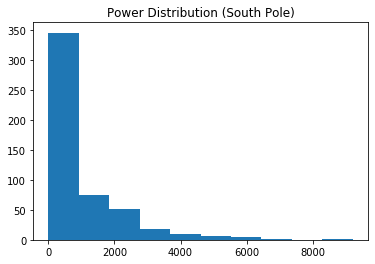

In [7]:
'exponential fit'

P_nth = list(np.array(V_nth)**2)
n3, bins3, patches3 = plt.hist(P_nth, histtype = u'stepfilled')
plt.title('Power Distribution (North Pole)')
plt.show()

P_sth = list(np.array(V_sth)**2)
n4, bins4, patches4 = plt.hist(P_sth, histtype = u'stepfilled')
plt.title('Power Distribution (South Pole)')
plt.show()

In [8]:
VS_FFT= np.fft.fft(V_sth); VN_FFT=np.fft.fft(V_nth)

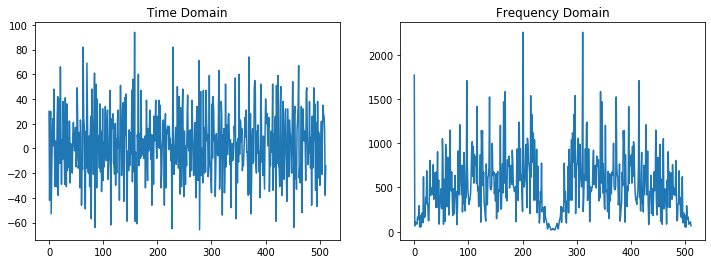

In [9]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.plot(V_nth)
plt.title('Time Domain')

plt.subplot(122)
plt.plot(abs(VN_FFT))
plt.title('Frequency Domain')

plt.show()

# Power Spectra

In [10]:
Nmax= 512
Navg=256
VS_FFT= np.zeros([Navg,Nmax], 'complex')
VN_FFT= np.zeros([Navg,Nmax], 'complex')
istart=0
iend=Nmax
for i in range(Navg):
    V_nth=data[istart:iend,0]
    V_sth=data[istart:iend,1]
    VS_FFT[i:]=np.fft.fft(V_sth)
    VN_FFT[i:]=np.fft.fft(V_nth)
    istart+=Nmax; iend+=Nmax

In [11]:
VS_FFTavg = np.mean(abs(VS_FFT),axis=0)
VN_FFTavg = np.mean(abs(VN_FFT),axis=0)

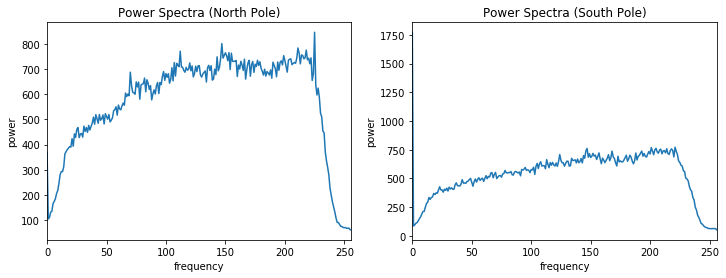

In [12]:
plt.figure(figsize = (12,4))

plt.subplot(121)
plt.plot(VS_FFTavg)
plt.xlim(0,Nmax/2)
plt.title('Power Spectra (North Pole)')
plt.xlabel('frequency')
plt.ylabel('power')

plt.subplot(122)
plt.plot(VN_FFTavg)
plt.xlim(0,Nmax/2)
plt.title('Power Spectra (South Pole)')
plt.xlabel('frequency')
plt.ylabel('power')
plt.show()

# Dynamic Spectra

In [13]:
Vn = df[0]
Vs = df[1]

In [14]:
Vn_sd = Vn[0:512]
Vs_sd = Vs[0:512]

In [15]:
Vn_sd_fft = np.fft.fft(Vn_sd)
Vs_sd_fft = np.fft.fft(Vs_sd)

In [16]:
image = []
i=0
j=0
while i <len(Vn):
    k = i
    i = i + 512
    Vn_new = Vn[k:i]
    Vn_new_fft = np.fft.fft(Vn_new)
    Vn_modsq = Vn_new_fft*np.conj(Vn_new_fft)
    image.append(Vn_modsq.real[0:512])

In [17]:
i = 0
image_2 = []
while i < len(image):
    k = i
    i = i + 60
    stacked = np.stack(image[k:i])
    avg = np.average(stacked, axis = 0)
    image_2.append(avg)

In [18]:
len(image_2), len(image_2[0])

(1000, 512)

In [19]:
d_spectra = np.matrix(image_2)
d_spectra_1 = d_spectra.transpose() 

Text(0, 0.5, 'Frequency ($\\nu$)')

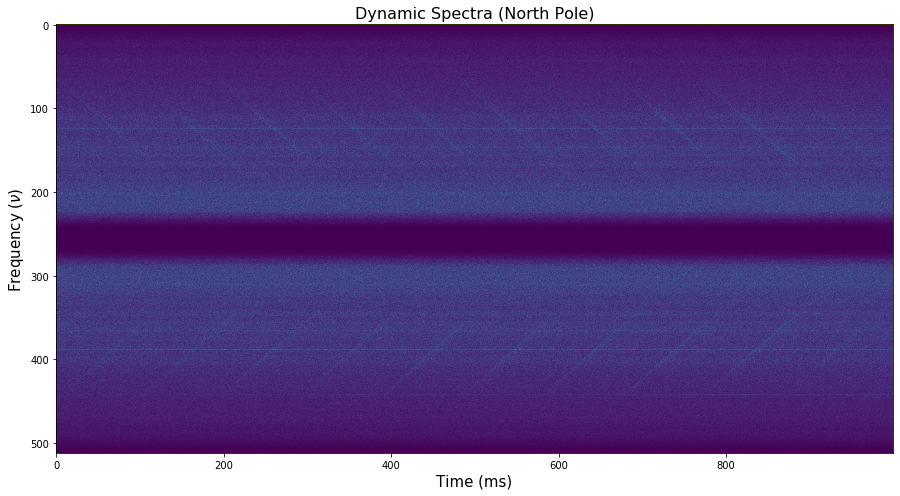

In [20]:
plt.figure(figsize=(15,20))

plt.imshow(d_spectra_1)
plt.title('Dynamic Spectra (North Pole)',fontsize=16)
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('Frequency ($\\nu$)',fontsize=15)

#plt.savefig('dynamic_spectra1.png')

In [21]:
image = []
i=0
j=0
while i <len(Vn):
    k = i
    i = i + 512
    Vs_new = Vn[k:i]
    Vs_new_fft = np.fft.fft(Vs_new)
    Vs_modsq = Vs_new_fft*np.conj(Vs_new_fft)
    Vs_real = Vs_modsq.real
    image.append(Vs_real[0:256])

In [22]:
i = 0
image_2 = []
while i < len(image):
    k = i
    i = i + 60
    stacked = np.stack(image[k:i])
    avg = np.average(stacked, axis = 0)
    image_2.append(avg)

In [23]:
d_spectra_N = np.matrix(image_2)
d_spectra_2 = d_spectra_N.transpose() 

Text(0, 0.5, 'Frequency ($\\nu$)')

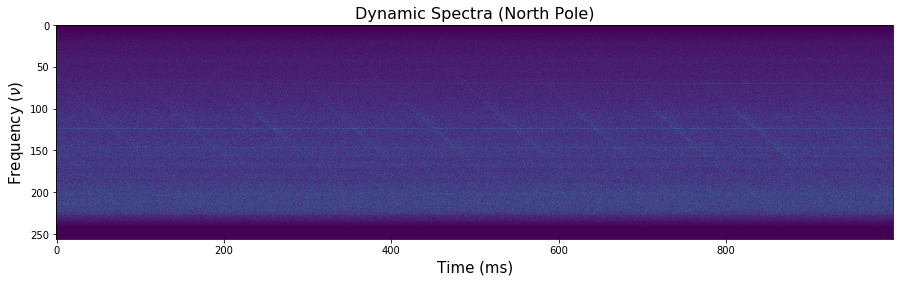

In [24]:
plt.figure(figsize=(15,20))

plt.imshow(d_spectra_2)
plt.title('Dynamic Spectra (North Pole)',fontsize=16)
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('Frequency ($\\nu$)',fontsize=15)

#plt.savefig('dynamic_spectra2.png')

# Correlation between the signals from North and South Poles

In [25]:
image_c= []
i=0
j=0
while i <len(Vn):
    k = i
    i = i + 512
    VN_new = Vn[k:i]
    VS_new = Vs[k:i]
    VN_fft = np.array(np.fft.fft(VN_new))
    VS_fft = np.array(np.fft.fft(VS_new))
    V_corr_fft = (VN_fft*np.conj(VS_fft))
    V_modsq = V_corr_fft*np.conj(V_corr_fft)
    V_real = V_modsq.real
    image_c.append(V_real[0:256])

In [26]:
i = 0
image_corr = []
while i < len(image_c):
    k = i
    i = i + 64
    stacked_corr = np.stack(image_c[k:i])
    avg_corr = np.average(stacked_corr, axis = 0)
    image_corr.append(avg_corr)

In [27]:
d_spectra_c = np.matrix(image_corr)
d_spectra_corr = d_spectra_c.transpose() 

Text(0, 0.5, 'Frequency ($\\nu$)')

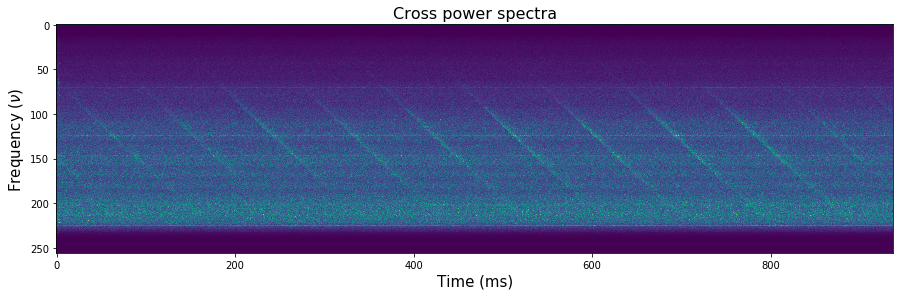

In [28]:
plt.figure(figsize=(15,20))
plt.imshow(d_spectra_corr)
plt.title('Cross power spectra',fontsize=16)
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('Frequency ($\\nu$)',fontsize=15)

#plt.savefig('dynamic_spectra_cross_corr.png')

# De-Dispersion of the Signal

In [29]:
dedisp = np.zeros((256,938))
frequency_channel =  256
bandwidth = 16.5
cen_freq = 326.5
DM = 70
freq = np.linspace(cen_freq-bandwidth/2,cen_freq+bandwidth/2,frequency_channel-1)

In [30]:
a1 = np.transpose(image_corr)

In [31]:
for i in range(255):
    delay = 4.15*1e6*DM*(((freq[i])**-2)-((cen_freq)**-2))   
    dedisp[i] = shift(a1[i],delay) 

Text(0, 0.5, 'Frequency ($\\nu$)')

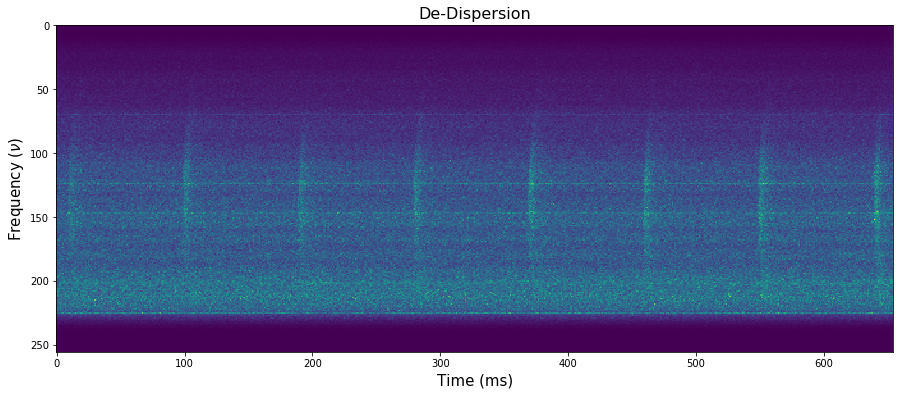

In [32]:
plt.figure(figsize=(15,20))
plt.imshow(dedisp[:,145:800])
plt.title('De-Dispersion',fontsize=16)
plt.xlabel('Time (ms)',fontsize=15)
plt.ylabel('Frequency ($\\nu$)',fontsize=15)

#plt.savefig('dedispersed_image.png')

In [33]:
new = dedisp[:,80:750]
pulses = dedisp.sum(0)[150:750]

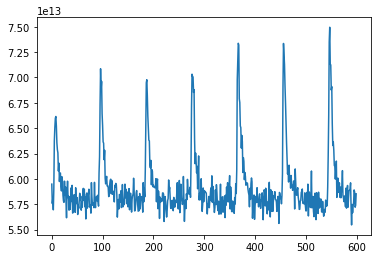

In [34]:
plt.plot(pulses)

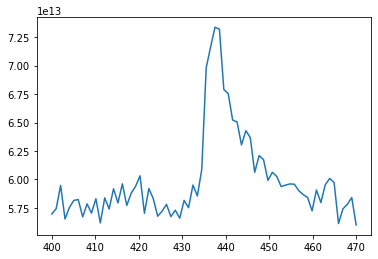

In [35]:
y = new.sum(0)
y = y[400:470]
x = np.linspace(400,470,len(y))
plt.plot(x,y)

# Time Period of the Pulsar

In [36]:
# Now try to find out the period of a pulsar